In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rim = pd.read_csv('/Users/andrewnorris/capstone_legaloccupancy/datasets/RiskInputModel.csv')

In [3]:
rim.shape

(17, 6)

In [4]:
rim.head()

,Neighborhood,BusinessLossMetric,StaffCancellationMetric,VenuesPer1kMetric,OLS_PCT_Metric,VarietyMetric
0,Astoria/LIC,1.104798,0.333849,0.199923,-1.261206,0.598250
1,Bed-Stuy,0.725636,0.333849,-0.198551,1.005571,0.490202
2,Bed-Stuy/Bushwick,0.961647,0.333849,-0.592874,1.422584,0.042846
3,Williamsburg/Bushwick/Bed-Stuy,-0.549198,0.333849,-0.477378,1.046466,0.321021
4,Bushwick,0.673548,0.333849,-0.485231,0.885349,-0.694534


## Gaussian Mixture Clustering

In [5]:
cluster_data = rim.iloc[:,1:6]

In [6]:
cluster_data.shape

(17, 5)

**4 components:**

In [7]:
from sklearn.mixture import GaussianMixture
# 4 components
GM=GaussianMixture(n_components=4,random_state=999)
GM.fit(cluster_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
# compute each neighborhoods's LL wrt nearest cluster center
GM_LL = pd.DataFrame()
GM_LL['LL'] = GM.score_samples(cluster_data)
GM_LL['Neighborhood'] = rim['Neighborhood']

In [9]:
# most anamolous neighborhoods
GM_LL.sort_values(by=['LL'])

,LL,Neighborhood
8,0.108834,Greenpoint
7,0.136726,Flushing
16,1.052728,Williamsburg
13,1.071042,LES
11,1.417952,Jackson Heights
9,1.763555,Harlem
2,1.792648,Bed-Stuy/Bushwick
3,2.098242,Williamsburg/Bushwick/Bed-Stuy
4,2.346745,Bushwick
1,2.959487,Bed-Stuy


## Variety and Venue counts multipled by negative 1

In [10]:
rim_2 = rim

In [18]:
rim_2['VenuesPer1kMetric'] = rim_2['VenuesPer1kMetric']*-1
rim_2['VarietyMetric'] = rim_2['VarietyMetric']*-1

In [19]:
rim_2.head()

,Neighborhood,BusinessLossMetric,StaffCancellationMetric,VenuesPer1kMetric,OLS_PCT_Metric,VarietyMetric
0,Astoria/LIC,1.104798,0.333849,0.199923,-1.261206,0.598250
1,Bed-Stuy,0.725636,0.333849,-0.198551,1.005571,0.490202
2,Bed-Stuy/Bushwick,0.961647,0.333849,-0.592874,1.422584,0.042846
3,Williamsburg/Bushwick/Bed-Stuy,-0.549198,0.333849,-0.477378,1.046466,0.321021
4,Bushwick,0.673548,0.333849,-0.485231,0.885349,-0.694534


In [20]:
cluster_data_2 = rim_2.iloc[:,1:6]

In [21]:
from sklearn.mixture import GaussianMixture
GM_2=GaussianMixture(n_components=3,random_state=999)
GM_2.fit(cluster_data_2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [22]:
# compute each neighborhoods's LL wrt nearest cluster center
GM_LL_2 = pd.DataFrame()
GM_LL_2['LL'] = GM_2.score_samples(cluster_data_2)
GM_LL_2['Neighborhood'] = rim_2['Neighborhood']

In [23]:
# most anamolous neighborhoods
GM_LL_2.sort_values(by=['LL'])

,LL,Neighborhood
15,-8.231167,South Bronx
8,-6.983706,Greenpoint
7,-6.952962,Flushing
16,-5.945373,Williamsburg
13,-5.925212,LES
11,-5.543709,Jackson Heights
9,-5.163477,Harlem
2,-5.131445,Bed-Stuy/Bushwick
3,-4.795305,Williamsburg/Bushwick/Bed-Stuy
4,-4.521943,Bushwick


*Multiplying static features by -1 does not change results.*

## Clustering on "dynamic" features (business loss, staff cancellation, CRE value trends)

In [24]:
rim_3 = rim[['Neighborhood','BusinessLossMetric','StaffCancellationMetric','OLS_PCT_Metric']]
rim_3.head()

,Neighborhood,BusinessLossMetric,StaffCancellationMetric,OLS_PCT_Metric
0,Astoria/LIC,1.104798,0.333849,-1.261206
1,Bed-Stuy,0.725636,0.333849,1.005571
2,Bed-Stuy/Bushwick,0.961647,0.333849,1.422584
3,Williamsburg/Bushwick/Bed-Stuy,-0.549198,0.333849,1.046466
4,Bushwick,0.673548,0.333849,0.885349


In [25]:
cluster_data_3 = rim_3.iloc[:,1:4]

3 components:

In [26]:
GM_3=GaussianMixture(n_components=3,random_state=999)
GM_3.fit(cluster_data_3)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
GM_LL_3 = pd.DataFrame()
GM_LL_3['LL'] = GM_3.score_samples(cluster_data_3)
GM_LL_3['Neighborhood'] = rim_3['Neighborhood']

In [28]:
# most anamolous neighborhoods
GM_LL_3.sort_values(by=['LL'])

,LL,Neighborhood
8,1.982917,Greenpoint
13,2.978385,LES
2,3.228624,Bed-Stuy/Bushwick
0,3.235096,Astoria/LIC
6,3.263073,Elmhurst
5,3.336031,Chelsea
16,3.486532,Williamsburg
9,3.579181,Harlem
11,3.616335,Jackson Heights
7,3.643017,Flushing


**Clustering on dynamic features results in overall more anomalous neighborhoods, with less variation in LL distribution.**

## Silhouette Score: determining best number of GM components

In [29]:
from sklearn import metrics
# dataset - includes all 5 risk factors "cluster_data"
cluster_data = rim.iloc[:,1:6]

In [30]:
# # GMM plot function
# def plot_gmm(gmm, X, label=True, ax=None):
#     ax = ax or plt.gca()
#     labels = gmm.fit(X).predict(X)
#     if label:
#         ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
#     else:
#         ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
#     w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
#     plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
#     plt.xlabel("U.A.")
#     plt.ylabel("U.A.")

In [31]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

Text(0, 0.5, 'Score')

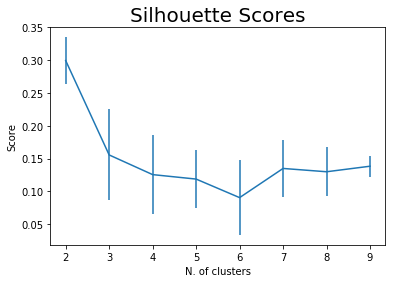

In [32]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(cluster_data) 
        labels=gmm.predict(cluster_data)
        sil=metrics.silhouette_score(cluster_data, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
    
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

Silhouette scores show 2 clusters is most appropriate.

## Gaussian Mixture Clustering - 2 components, all risk features ##

In [ ]:
# standard features (not *-1)

In [41]:
cluster_data_4 = rim.iloc[:,1:6]

In [42]:
# 2 components
GM_4=GaussianMixture(n_components=2,random_state=999) 
GM_4.fit(cluster_data_4)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [43]:
# compute each neighborhoods's LL wrt nearest cluster center
GM_LL_4 = pd.DataFrame()
GM_LL_4['LL'] = GM_4.score_samples(cluster_data_4)
GM_LL_4['Neighborhood'] = rim_2['Neighborhood']

In [44]:
# most anamolous neighborhoods
GM_LL_4.sort_values(by=['LL'])

,LL,Neighborhood
15,-7.764758,South Bronx
8,-7.139911,Greenpoint
7,-6.610329,Flushing
16,-6.176580,Williamsburg
13,-5.809674,LES
9,-5.762330,Harlem
12,-5.110329,LIC
2,-5.044145,Bed-Stuy/Bushwick
5,-5.027547,Chelsea
14,-5.025698,Ridgewood


In [48]:
# features *-1
cluster_data_6 = rim_2.iloc[:,1:6]
# 2 components
GM_6=GaussianMixture(n_components=2,random_state=999) 
GM_6.fit(cluster_data_6)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [49]:
# compute each neighborhoods's LL wrt nearest cluster center
GM_LL_6 = pd.DataFrame()
GM_LL_6['LL'] = GM_6.score_samples(cluster_data_6)
GM_LL_6['Neighborhood'] = rim_2['Neighborhood']

In [50]:
# most anamolous neighborhoods
GM_LL_6.sort_values(by=['LL'])

,LL,Neighborhood
15,-7.764758,South Bronx
8,-7.139911,Greenpoint
7,-6.610329,Flushing
16,-6.176580,Williamsburg
13,-5.809674,LES
9,-5.762330,Harlem
12,-5.110329,LIC
2,-5.044145,Bed-Stuy/Bushwick
5,-5.027547,Chelsea
14,-5.025698,Ridgewood


In [47]:
rim_2['VenuesPer1kMetric'] = rim_2['VenuesPer1kMetric']*-1
rim_2['VarietyMetric'] = rim_2['VarietyMetric']*-1

## Gaussian Mixture Clustering - 2 components, only dynamic risk features ##

In [79]:
cluster_data_5 = rim_3.iloc[:,1:4]

In [80]:
# 2 components
GM_5=GaussianMixture(n_components=2,random_state=999) # should we specify a random state here?
GM_5.fit(cluster_data_5)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [81]:
# compute each neighborhoods's LL wrt nearest cluster center
GM_LL_5 = pd.DataFrame()
GM_LL_5['LL'] = GM_5.score_samples(cluster_data_5)
GM_LL_5['Neighborhood'] = rim_2['Neighborhood']

In [82]:
# most anamolous neighborhoods
GM_LL_5.sort_values(by=['LL'])

,LL,Neighborhood
8,2.048505,Greenpoint
0,2.771978,Astoria/LIC
2,2.809301,Bed-Stuy/Bushwick
6,2.843316,Elmhurst
5,3.188980,Chelsea
16,3.226181,Williamsburg
7,3.242081,Flushing
3,3.469212,Williamsburg/Bushwick/Bed-Stuy
9,3.480191,Harlem
13,3.518988,LES
